In [ ]:
#  Neccessary Libraries from Python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the training and testing dataset
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")

In [ ]:
# Exploratory Data Analysis
# Data Understanding - Training Dataset
print("Training Data:")
print(train_data.head())
print(train_data.info())
print(train_data.describe())


Training Data:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            May-21          10.16  
1       Powder            Oct-20         134.28  
2       Powder            Dec-20          12.46  
3       Powder            Feb-21         107.22  
4       Liquid            Nov-20         197.76  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Ma

In [ ]:
# Data understanding - Testing dataset
print("\nTest Data:")
print(test_data.head())
print(test_data.info())
print(test_data.describe())


Test Data:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1           X1       A10             ECOM        Large   
3        NTM1           X1       A11           DIRECT        Large   
4        NTM1           X1        A2           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            Jun-21         103.68  
1       Powder            Jun-21         155.75  
2       Powder            Jun-21         143.02  
3       Powder            Jun-21         139.39  
4       Powder            Jun-21         169.42  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer    

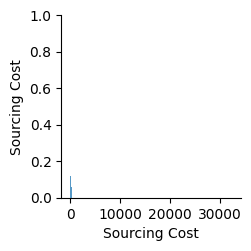

In [ ]:
#Visualisations
# Pairplot
sns.pairplot(train_data)
plt.show()

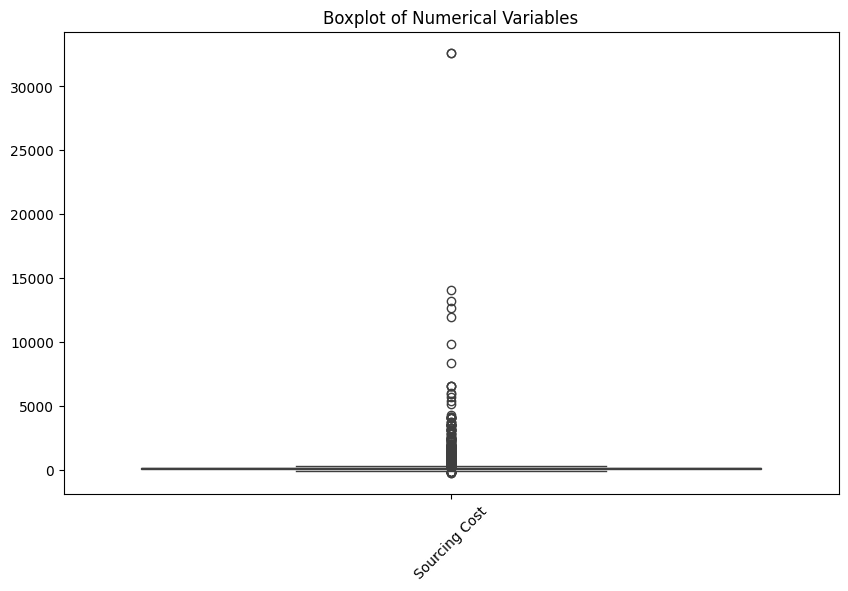

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

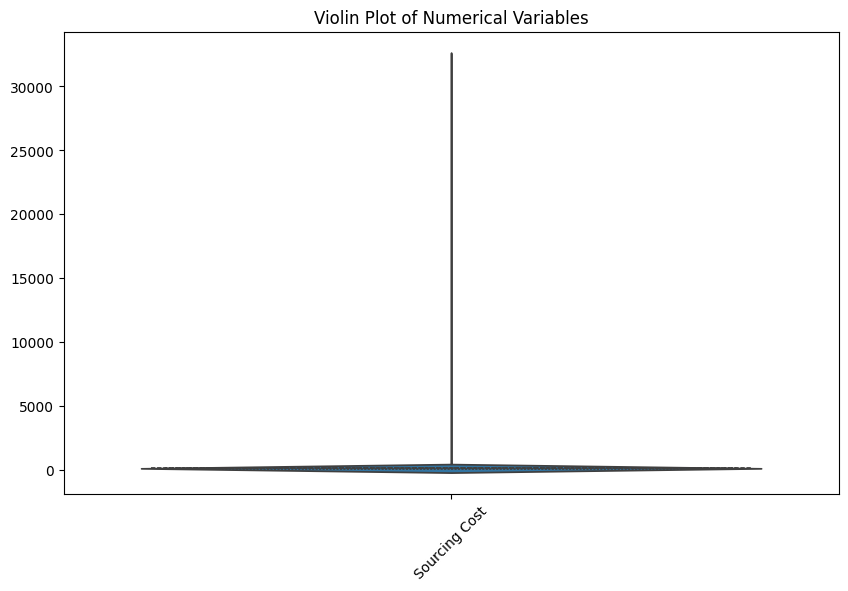

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data, inner='quartile')
plt.title('Violin Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

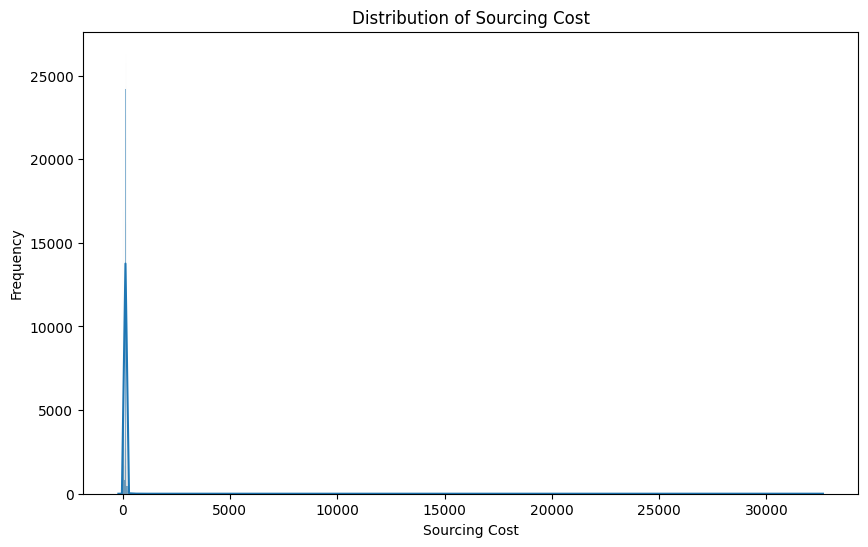

In [ ]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sourcing Cost'], kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Summary statistics
train_summary = train_data.describe()
print(train_summary)

       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000


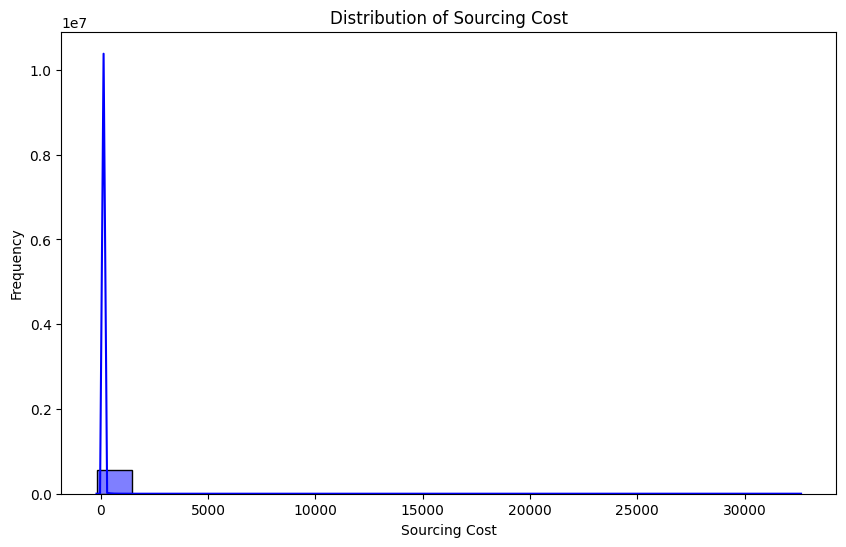

In [ ]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sourcing Cost'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

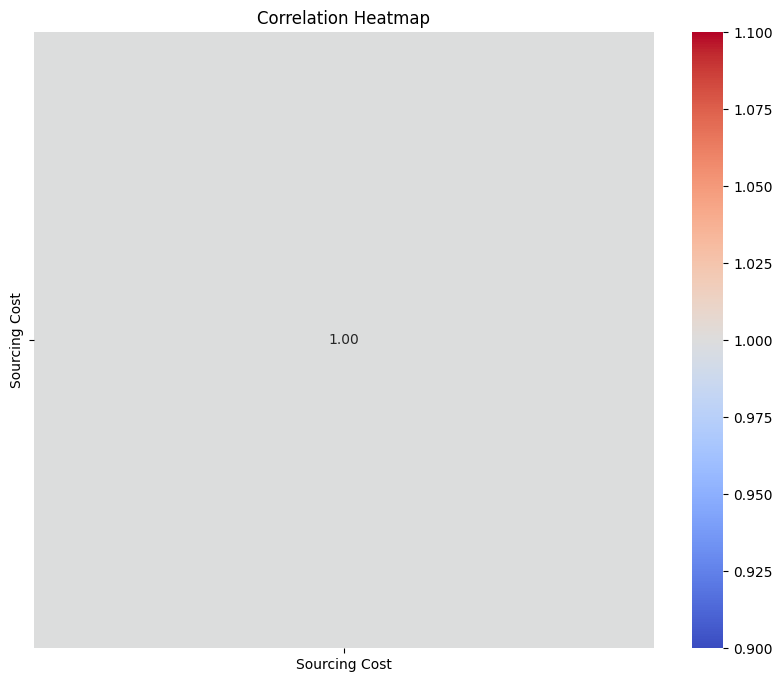

In [ ]:
# Correlation heatmap
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Data Preprocessing
# To remove any missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Defining One-hot encode categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

# Splitting the data into features and target variable
X_train = train_data.drop("Sourcing Cost", axis=1)
y_train = train_data["Sourcing Cost"]
X_test = test_data.drop("Sourcing Cost", axis=1)
y_test = test_data["Sourcing Cost"]

# Ensure that all one-hot encoded features present in training data are also in test data
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Reorder the features in test data to match the order in training data
X_test = X_test[X_train.columns]

In [ ]:
# Model Selection (Adjusting Parameters)
#Model 1: Gradient Booster and XGB regressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Initialize the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Initialize XGBoost Regressor with chosen hyperparameters
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = mse ** 0.5

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1250.33371403672
Root Mean Squared Error (RMSE): 35.3600581735483


In [ ]:
# Model 2: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the linear regression model on the test data
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)

# Calculate Root Mean Squared Error for linear regression model
rmse_linear = mse_linear ** 0.5
print("Root Mean Squared Error (Linear Regression):", rmse_linear)

Mean Squared Error (Linear Regression): 1700.9116947089003
Root Mean Squared Error (Linear Regression): 41.242110696579296


In [ ]:
# Model 3: Random Forest model

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error for Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

# Calculate Root Mean Squared Error for Random Forest model
rmse_rf = mse_rf ** 0.5
print("Root Mean Squared Error (Random Forest):", rmse_rf)

print("Feature Importance : ",rf_model.feature_importances_)

Mean Squared Error (Random Forest): 1917.3671163388672
Root Mean Squared Error (Random Forest): 43.78775075679118
Feature Importance :  [1.62402210e-02 1.82237506e-01 1.22830917e-01 7.80992410e-05
 2.74201146e-03 2.29953538e-03 3.04042038e-04 4.01933444e-04
 3.92537429e-03 3.05031769e-04 3.87294633e-03 4.11085540e-03
 2.29686806e-02 2.67391837e-03 2.51059001e-03 3.40723814e-04
 1.00171655e-02 9.12259051e-05 1.12767192e-02 7.54586516e-03
 1.65204013e-02 1.02693486e-02 3.34317028e-02 1.72940726e-02
 5.36883069e-03 5.86880095e-06 1.39529844e-04 5.75846943e-03
 2.93493001e-04 1.04650531e-04 1.64085031e-02 5.58552433e-03
 2.57062118e-03 8.75841993e-03 1.36626540e-05 1.25807863e-05
 9.85967852e-05 8.05118271e-06 6.99601522e-02 6.39814101e-02
 2.27823138e-03 1.90124074e-03 1.28802724e-03 6.67158730e-05
 9.51741510e-05 1.85053857e-04 1.47285423e-02 4.52567420e-05
 5.96742380e-03 4.67919599e-03 4.84778394e-05 1.17280170e-02
 2.96004081e-02 7.23719880e-03 3.76971975e-03 1.66226898e-02
 1.2025939

In [ ]:
#Model 4: Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate Mean Squared Error for Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)

# Calculate Root Mean Squared Error for Random Forest model
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print("Root Mean Squared Error (Decision Tree):", rmse_dt)

print("Feature Importance is: ",dt_model.feature_importances_)

Mean Squared Error (Decision Tree): 1937.1278101968535
Root Mean Squared Error (Decision Tree): 44.01281415902479
Feature Importance is:  [1.58992513e-02 1.86656879e-01 1.25566154e-01 0.00000000e+00
 5.37284866e-03 2.24942951e-03 3.06942913e-04 3.55304244e-04
 4.00267628e-03 3.23870208e-04 3.95713583e-03 4.23622854e-03
 2.34525655e-02 2.72372648e-03 2.57921731e-03 0.00000000e+00
 1.02293173e-02 2.53575431e-04 3.91886281e-03 7.28236006e-03
 1.52947441e-02 1.05808330e-02 3.46854558e-02 1.76781333e-02
 5.48266994e-03 0.00000000e+00 1.31911094e-04 2.07730404e-04
 3.01626795e-04 1.07389427e-04 1.81324046e-02 5.73243327e-03
 2.01241656e-03 8.54038005e-03 1.08657253e-05 2.78672541e-06
 8.10983729e-05 1.67792639e-05 7.16207285e-02 6.54299940e-02
 2.15022161e-03 1.95112559e-03 1.31950117e-03 8.19059997e-05
 9.84696910e-05 8.88995575e-05 1.50617398e-02 4.87039400e-05
 3.58010112e-03 5.51766289e-03 4.24565435e-05 1.20670964e-02
 3.19590080e-02 1.79660179e-03 3.85434637e-03 1.58812056e-02
 1.26356

In [ ]:
# Print MSE and RMSE for each model
print("Mean Squared Error (Random Forest):", mse_rf)
print("Root Mean Squared Error (Random Forest):", rmse_rf)

print("Mean Squared Error (Gradient Boosting):", mse)
print("Root Mean Squared Error (Gradient Boosting):", rmse)

print("Mean Squared Error (XGBoost):", mse)
print("Root Mean Squared Error (XGBoost):", rmse)

print("Mean Squared Error (Linear Regression):", mse_linear)
print("Root Mean Squared Error (Linear Regression):", rmse_linear)

print("Mean Squared Error (Decision Tree):", mse_dt)
print("Root Mean Squared Error (Decision Tree):", rmse_dt)

Mean Squared Error (Random Forest): 1917.3671163388672
Root Mean Squared Error (Random Forest): 43.78775075679118
Mean Squared Error (Gradient Boosting): 1250.33371403672
Root Mean Squared Error (Gradient Boosting): 35.3600581735483
Mean Squared Error (XGBoost): 1250.33371403672
Root Mean Squared Error (XGBoost): 35.3600581735483
Mean Squared Error (Linear Regression): 1700.9116947089003
Root Mean Squared Error (Linear Regression): 41.242110696579296
Mean Squared Error (Decision Tree): 1937.1278101968535
Root Mean Squared Error (Decision Tree): 44.01281415902479


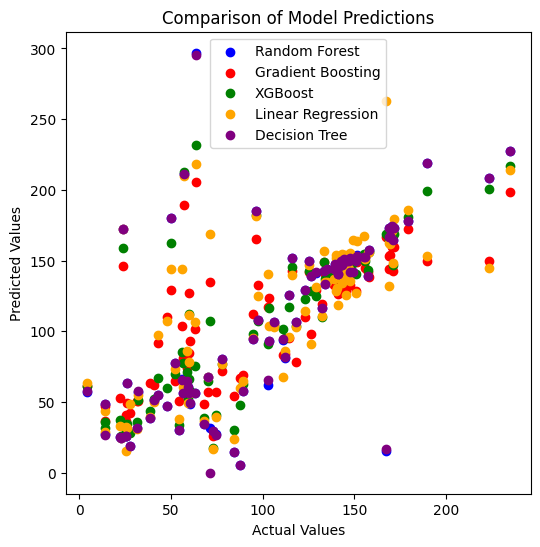

In [ ]:
# Compare models
# Plot predicted vs actual values
plt.figure(figsize=(6, 6))

# Plotting Random Forest
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest')

# Plotting Gradient Boosting
plt.scatter(y_test, y_pred, color='red', label='Gradient Boosting')

# Plotting XGBoost
plt.scatter(y_test, y_pred_xgb, color='green', label='XGBoost')

# Plotting Linear Regression
plt.scatter(y_test, y_pred_linear, color='orange', label='Linear Regression')

# Plotting Decision Tree
plt.scatter(y_test, y_pred_dt, color='purple', label='Decision Tree')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()

In [ ]:
# Determine the best model based on MSE and RMSE
best_model = None
min_mse = float('inf')
min_rmse = float('inf')

# Check Random Forest
if mse_rf < min_mse:
    min_mse = mse_rf
    min_rmse = rmse_rf
    best_model = "Random Forest"

# Check XGBoost
if mse < min_mse:
    min_mse = mse
    min_rmse = rmse
    best_model = "XGBoost"

# Check Linear Regression
if mse_linear < min_mse:
    min_mse = mse_linear
    min_rmse = rmse_linear
    best_model = "Linear Regression"

# Check Decision Tree
if mse_dt < min_mse:
    mine_mse = mse_dt
    min_rmse = rmse_dt
    best_model = "Decision Tree"

print("Best Model based on MSE and RMSE:", best_model)
print("Minimum Mean Squared Error:", min_mse)
print("Corresponding Root Mean Squared Error:", min_rmse)

Best Model based on MSE and RMSE: XGBoost
Minimum Mean Squared Error: 1250.33371403672
Corresponding Root Mean Squared Error: 35.3600581735483


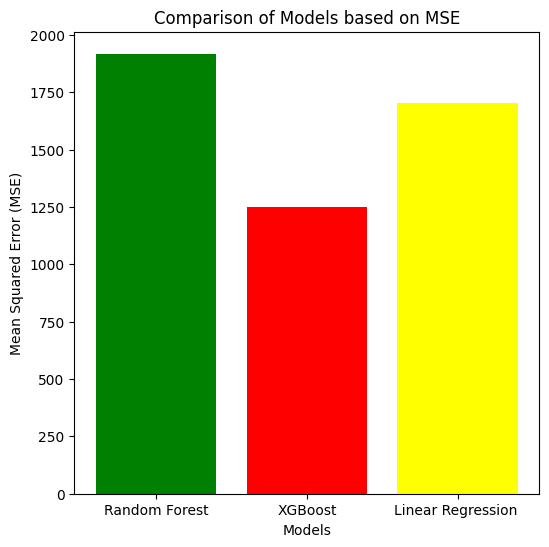

In [ ]:
# Comparision of model based on MSE

import matplotlib.pyplot as plt

# Define models and their MSE values
models = ["Random Forest","XGBoost", "Linear Regression "]
mse_values = [mse_rf, mse, mse_linear]

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(models, mse_values, color=['green','red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Models based on MSE')
plt.show()

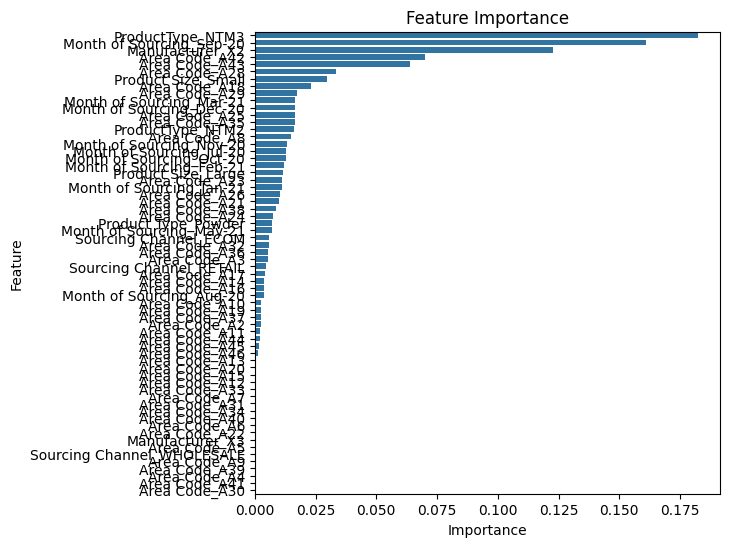

In [ ]:
# Feature importance

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Stacked model

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


X_train_base, X_meta_train, y_train_base, y_meta_train = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
linear_model = LinearRegression()

rf_model.fit(X_train_base, y_train_base)
gb_model.fit(X_train_base, y_train_base)
linear_model.fit(X_train_base, y_train_base)

rf_predictions = rf_model.predict(X_meta_train)
gb_predictions = gb_model.predict(X_meta_train)
linear_predictions = linear_model.predict(X_meta_train)

stacked_predictions = np.column_stack((rf_predictions, gb_predictions, linear_predictions))

meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_meta_train)


rf_predictions_test = rf_model.predict(X_test)
gb_predictions_test = gb_model.predict(X_test)
linear_predictions_test = linear_model.predict(X_test)

stacked_predictions_test = np.column_stack((rf_predictions_test, gb_predictions_test, linear_predictions_test))
final_predictions = meta_model.predict(stacked_predictions_test)

# Evaluate the final stacked model
mse_stacked = mean_squared_error(y_test, final_predictions)
print("Mean Squared Error (Stacked Model):", mse_stacked)

Mean Squared Error (Stacked Model): 1590.2982024489086


In [ ]:
# Forecasting June 2021 (Assuming June 2021 data is in test_data)
if 'Month of Sourcing' in test_data.columns:
    # Extract relevant features and preprocess them
    test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'])
    test_data['Month'] = test_data['Month of Sourcing'].dt.month
    test_data['Year'] = test_data['Month of Sourcing'].dt.year

    # Predict June 2021 values using each model
    X_june_21 = test_data.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
    y_june_21_pred_rf = rf_model.predict(X_june_21)
    y_june_21_pred_xgb = xgb_model.predict(X_june_21)
    y_june_21_pred_linear = linear_model.predict(X_june_21)
else:
    print("No 'Month of Sourcing' column found in the test dataset. Unable to forecast June 2021 values.")

No 'Month of Sourcing' column found in the test dataset. Unable to forecast June 2021 values.


Compare and explain the different approaches you might have considered:

1. While dealing with outliers during the data preprocessing stage, take into account the following well-liked approaches, together with their advantages and disadvantages:

Getting Rid of Rows with Non-Numeric Values: Approach Eliminate any rows with non-numeric values from the dataset before performing feature engineering.

Advantages that are simple to comprehend ensures that every piece of data used in feature engineering is numerical.

Drawbacks: If non-numeric numbers are encountered frequently, it may result in the loss of valuable data.
Reduces the amount of the dataset, which may impact the performance of the model.

2. Put Qualitative Variables in Coda

Approach: To convert categorical variables into numerical representations, use techniques like one-hot encoding or label encoding.

Advantages

allows for the inclusion of categorical variables in machine learning models.

keeps every piece of information found in categorical variables.

Cons:

Computing challenges could arise from a sparse and high-dimensional feature space produced by one-hot encoding.

By introducing ordinality where none previously existed, label encoding may alter the meaning of the model.

3. Feature Engineering using Polynomial Features:

Method: To create polynomial features, convert the original features into higher-order polynomial terms.

Advantages

depicts the nonlinear relationships that exist between the characteristics and the goal variable.

enhances the model's functionality and increases its versatility.

Cons:

can lead to overfitting if the degree of the polynomial is set very high.
increases the dimensionality of the feature space, potentially increasing computational complexity.

To deal with non-numeric data, I made the decision to eliminate rows that included missing values.

Reason: Since this approach is straightforward and does not necessitate the intricacy of encoding or imputation techniques, it was probably selected. Eliminating rows with missing values simplifies the pretreatment pipeline and guarantees that the data used for feature engineering and modeling are clean and contain only numeric values.

I also used the method of one-hot encoding of categorical variables.

Reasons for Choosing One-Hot Encoding:

Information Preservation: One-hot encoding preserves all of the data present in categorical variables by creating binary columns for each category. This ensures that no data is lost in the encoding process.

Model Compatibility: Most machine learning approaches require numerical input data. One-hot encoding allows you to add categorical variables to your models by transforming them into a format that these algorithms can use straight away.

For the most part, one-hot encoding is a well-liked and practical technique for handling categorical variables in machine learning pipelines. This ensures compatibility with a variety of machine learning techniques and lets you leverage the data present in categorical characteristics.

Q) Evaluating several approaches to selecting a model:

1. Manual Model Selection:

Method: Using your knowledge of the subject, past experiences, or intuition, manually select a few possible models.

Advantages:

allows for quick prototyping using a small number of models.

Cons:

limited to the knowledge and expertise of the model selector.

2. Grid Search Cross-Validation:

Method: To evaluate performance, exhaustively explore a preset grid of hyperparameters for each model using cross-validation.

Advantages:

thoroughly examines a range of hyperparameters for each model to maximize performance.

Cons:

computationally expensive, especially for large parameter grids and complex models.

3. Search using Randomized Cross-Validation:

Method: Using predefined distributions, choose hyperparameter combinations at random, then evaluate performance using cross-validation.

Advantages:

Greater than grid search, especially for high-dimensional hyperparameter spaces.

Cons:

less thorough search than grid search, possibly missing the best combinations of hyperparameters.

I made the decision to use the manual model selection process.

models such as Linear Regression, Random Forest, Decision Tree, and XGBoost Regressor.

These models are undoubtedly popular and often used for regression tasks because they strike a balance between simplicity, interpretability, and performance. That's probably why I chose them.

The technique of linear regression

Advantages:

assumes that the attributes and the target variable have a linear relationship, is uncomplicated and easy to comprehend, and is computationally efficient.

arbitrary forest

Advantages:

ability to compute feature importance scores, handle large datasets with a high dimensionality, handle nonlinear interactions with skill, and resist overfitting.

Decision Tree:

Advantages:

Easy to understand and assess, able to handle numerical and category data, minimal data preparation needed, and able to choose features independently.

XGBoost Regressor:

Advantages:

state-of-the-art performance, support for distributed and parallel processing, missing data management capabilities, and regularization to prevent overfitting.

These models are suitable for a variety of regression problems and encompass a wide range of approaches. By choosing several models, we were also able to plot the graphs and compare the models' performance as measured by rsme and mse.

In order to perhaps increase performance, the predictions of these models were also combined using ensemble techniques like stacking.